# Demo: Candidate ranking

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from typing import List

from lib import extract_from_pdf, pre_process
sns.set_theme()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alby\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load the job application

In [4]:
job = extract_from_pdf('docs/jobs/Data Scientist.pdf')
job

"Data Scientist/ ML Engineer\nGame Change Solutions\n-\nGurgaon, Haryana\nTemporarily remote\n₹20,00,000 - ₹25,00,000 a year\nWe are looking for a data scientist that will help us discover the information hidden in vast\namounts of data and help us make smarter decisions to deliver even better products. Your\nprimary focus will be in applying data mining techniques, doing statistical analysis, and\nbuilding high quality prediction systems integrated with our products. Data Scientist at\nGameChange must be an energetic self-starter who can quickly grasp the company’s vision,\ndevelop specific tactical plans, and begin implementation upon appropriate approvals. The\ncandidate must be resourceful and able to deliver on a plan defined.\nResponsibilities –\n• Data Crunching and data massaging on structured and unstructured data including\nNumerical, Text,\nAudio and Video data\n• Implementation/fine-tuning of machine learning algorithms\n• Conducting Data science/machine learning experiment

In [5]:
job = pre_process(job)
job

['Data Scientist/ ML Engineer Game Change Solutions - Gurgaon, Haryana Temporarily remote ₹20,00,000 - ₹25,00,000 a year We are looking for a data scientist that will help us discover the information hidden in vast amounts of data and help us make smarter decisions to deliver even better products.',
 'Your primary focus will be in applying data mining techniques, doing statistical analysis, and building high quality prediction systems integrated with our products.',
 'Data Scientist at GameChange must be an energetic self-starter who can quickly grasp the company’s vision, develop specific tactical plans, and begin implementation upon appropriate approvals.',
 'The candidate must be resourceful and able to deliver on a plan defined.',
 'Responsibilities –  Data Crunching and data massaging on structured and unstructured data including Numerical, Text, Audio and Video data  Implementation/fine-tuning of machine learning algorithms  Conducting Data science/machine learning experiments an

## Load the CVs

In [6]:
base_dir = 'docs/cvs/'
cvs = [ extract_from_pdf(base_dir + cv_path) for cv_path in os.listdir(base_dir) ]
cv_names = [cv[0:-4] for cv in os.listdir(base_dir)]
print(f"{len(cvs)} CVs were loaded.")

12 CVs were loaded.


In [7]:
cvs = [ pre_process(cv) for cv in cvs ]

In [8]:
cvs[0]

['Nandagopal HFeatured Resume MYSQL,MONGODB Database Administrator seeking roles in Database Administration,Configuration Management,Project Management,Software Development,Application Programming,Network Troubleshooting,Data Migration,Query Optimization,Cyber Security,MongoDB Current Designation: Senior Database Administrator Current Company: Fcoos Technologies Current Location: Bengaluru / Bangalore Pref.',
 'Location: Bengaluru / Bangalore,Kochi,Trivandrum Functional Area: IT Software - DBA / Datawarehousing Role: DBA Industry: IT-Software/Software Services Marital Status: Single/unmarried Total Experience: 2 Year(s) 4 Month(s) Notice Period: 1 Month Highest Degree: B.Sc [Computers] Key Skills: MYSQL,MONGODB Database Administrator,DBA,Database Administration,Configuration Management,Project Management,Software Development,Application Programming,Network Troubleshooting,Data Migration,Query Optimization,Cyber Security,MongoDB Verified : Phone Number | Email - id ID: 07ba2839a9194be0b

## Sentence Transformer

In [9]:
# Load the model
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
model.max_seq_length

128

In [10]:
def encode(sentences: List[str], progress_bar=False) -> np.ndarray:
    sentences_enc = model.encode(sentences, show_progress_bar=progress_bar)
    return np.mean(np.array(sentences_enc), axis=0)

In [11]:
# Encode
job_enc = encode(job)
cvs_enc = np.array([ encode(cv) for cv in cvs ])

In [12]:
print(cvs_enc[0])
print(cvs_enc[0].shape)

[ 2.80764680e-02  7.18727149e-03  3.83344828e-04  1.14793647e-02
 -1.85407382e-02 -8.72728322e-03 -1.15341898e-02 -1.10624507e-02
 -8.46552139e-04 -1.39485318e-02  4.97261435e-03  5.94236096e-03
 -6.81987824e-03  1.88292861e-02  2.08189413e-02  2.36093402e-02
  2.67228428e-02  2.70890053e-02 -3.35709518e-03 -2.49707792e-02
 -4.72088624e-03 -4.30630893e-03 -6.94034575e-03  1.64665654e-02
  3.83516471e-03 -8.06212518e-03  1.08892797e-02 -1.93568375e-02
 -2.52315719e-02  1.85318254e-02 -1.11506004e-02  7.20770471e-03
  1.90265626e-02  3.16431560e-02  1.72830578e-02 -1.14444699e-02
  4.11694385e-02 -4.44673607e-03 -1.11310510e-03  4.08683787e-04
 -1.47895329e-02  2.43269335e-02 -2.48128623e-02 -1.05817709e-02
 -6.33513415e-03 -5.46444505e-02 -2.46717930e-02 -2.79506538e-02
 -5.33868233e-03 -2.59439996e-03 -1.12075200e-02  2.27158852e-02
 -3.91995013e-02  3.26177105e-02  6.55616960e-03 -1.57218892e-02
 -6.10895175e-03 -5.52242436e-03  2.49870382e-02 -7.87521154e-03
 -3.66106583e-03 -1.42530

## Compute relevance

In [13]:
scores = util.cos_sim(job_enc, cvs_enc).numpy()
print(scores)

[[0.4291129  0.14359891 0.43013206 0.21881215 0.4274236  0.5693526
  0.46720693 0.21959549 0.5914459  0.38034898 0.35102803 0.3939882 ]]


<Axes: >

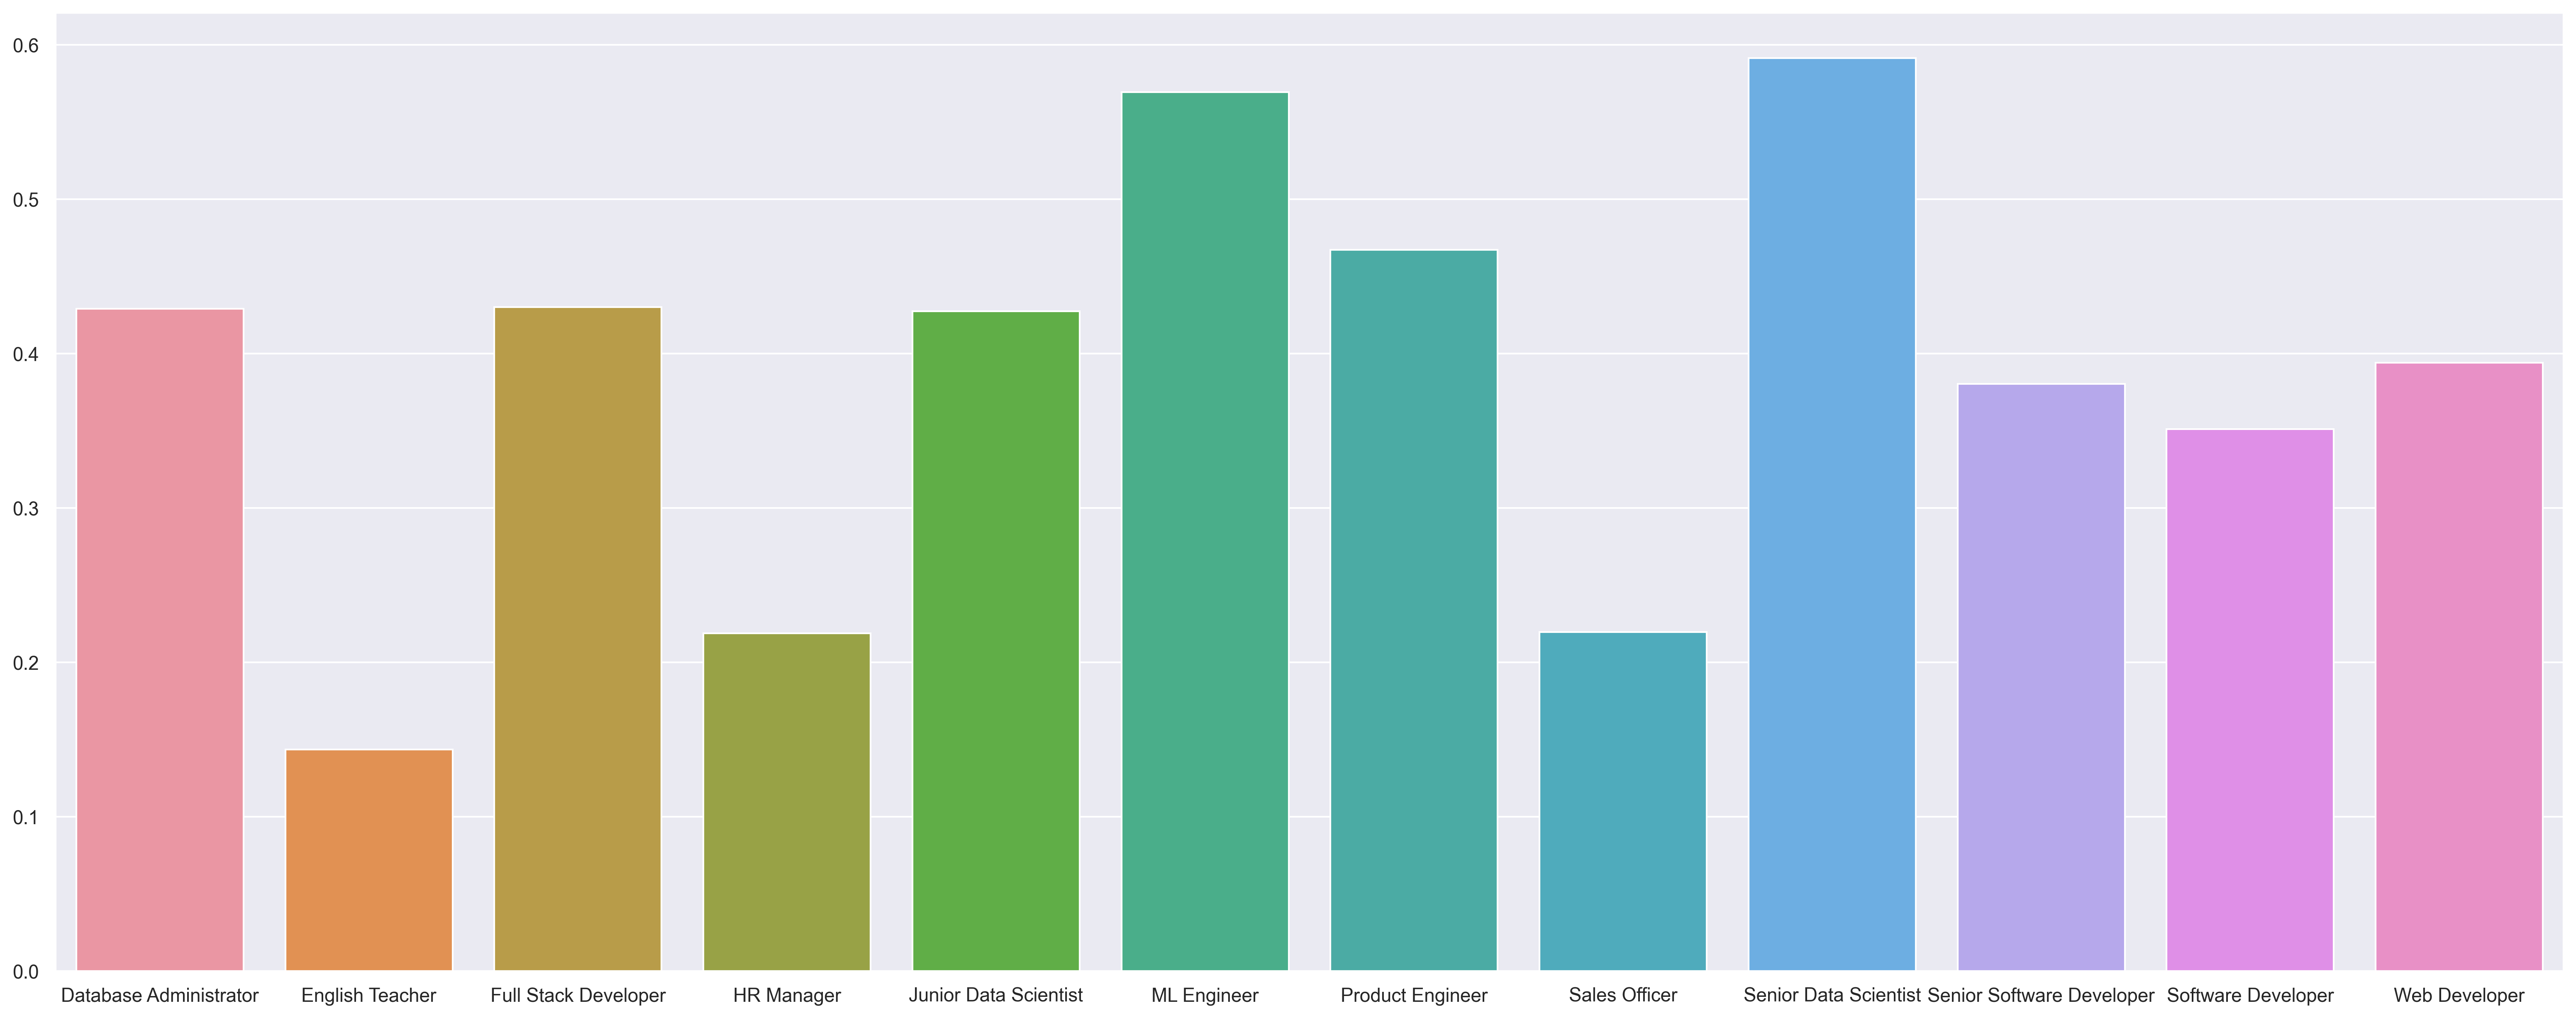

In [14]:
fig, ax = plt.subplots(figsize=(26,10), dpi=300)
sns.barplot(x=cv_names, y=scores[0], ax=ax)

# Different job

<Axes: >

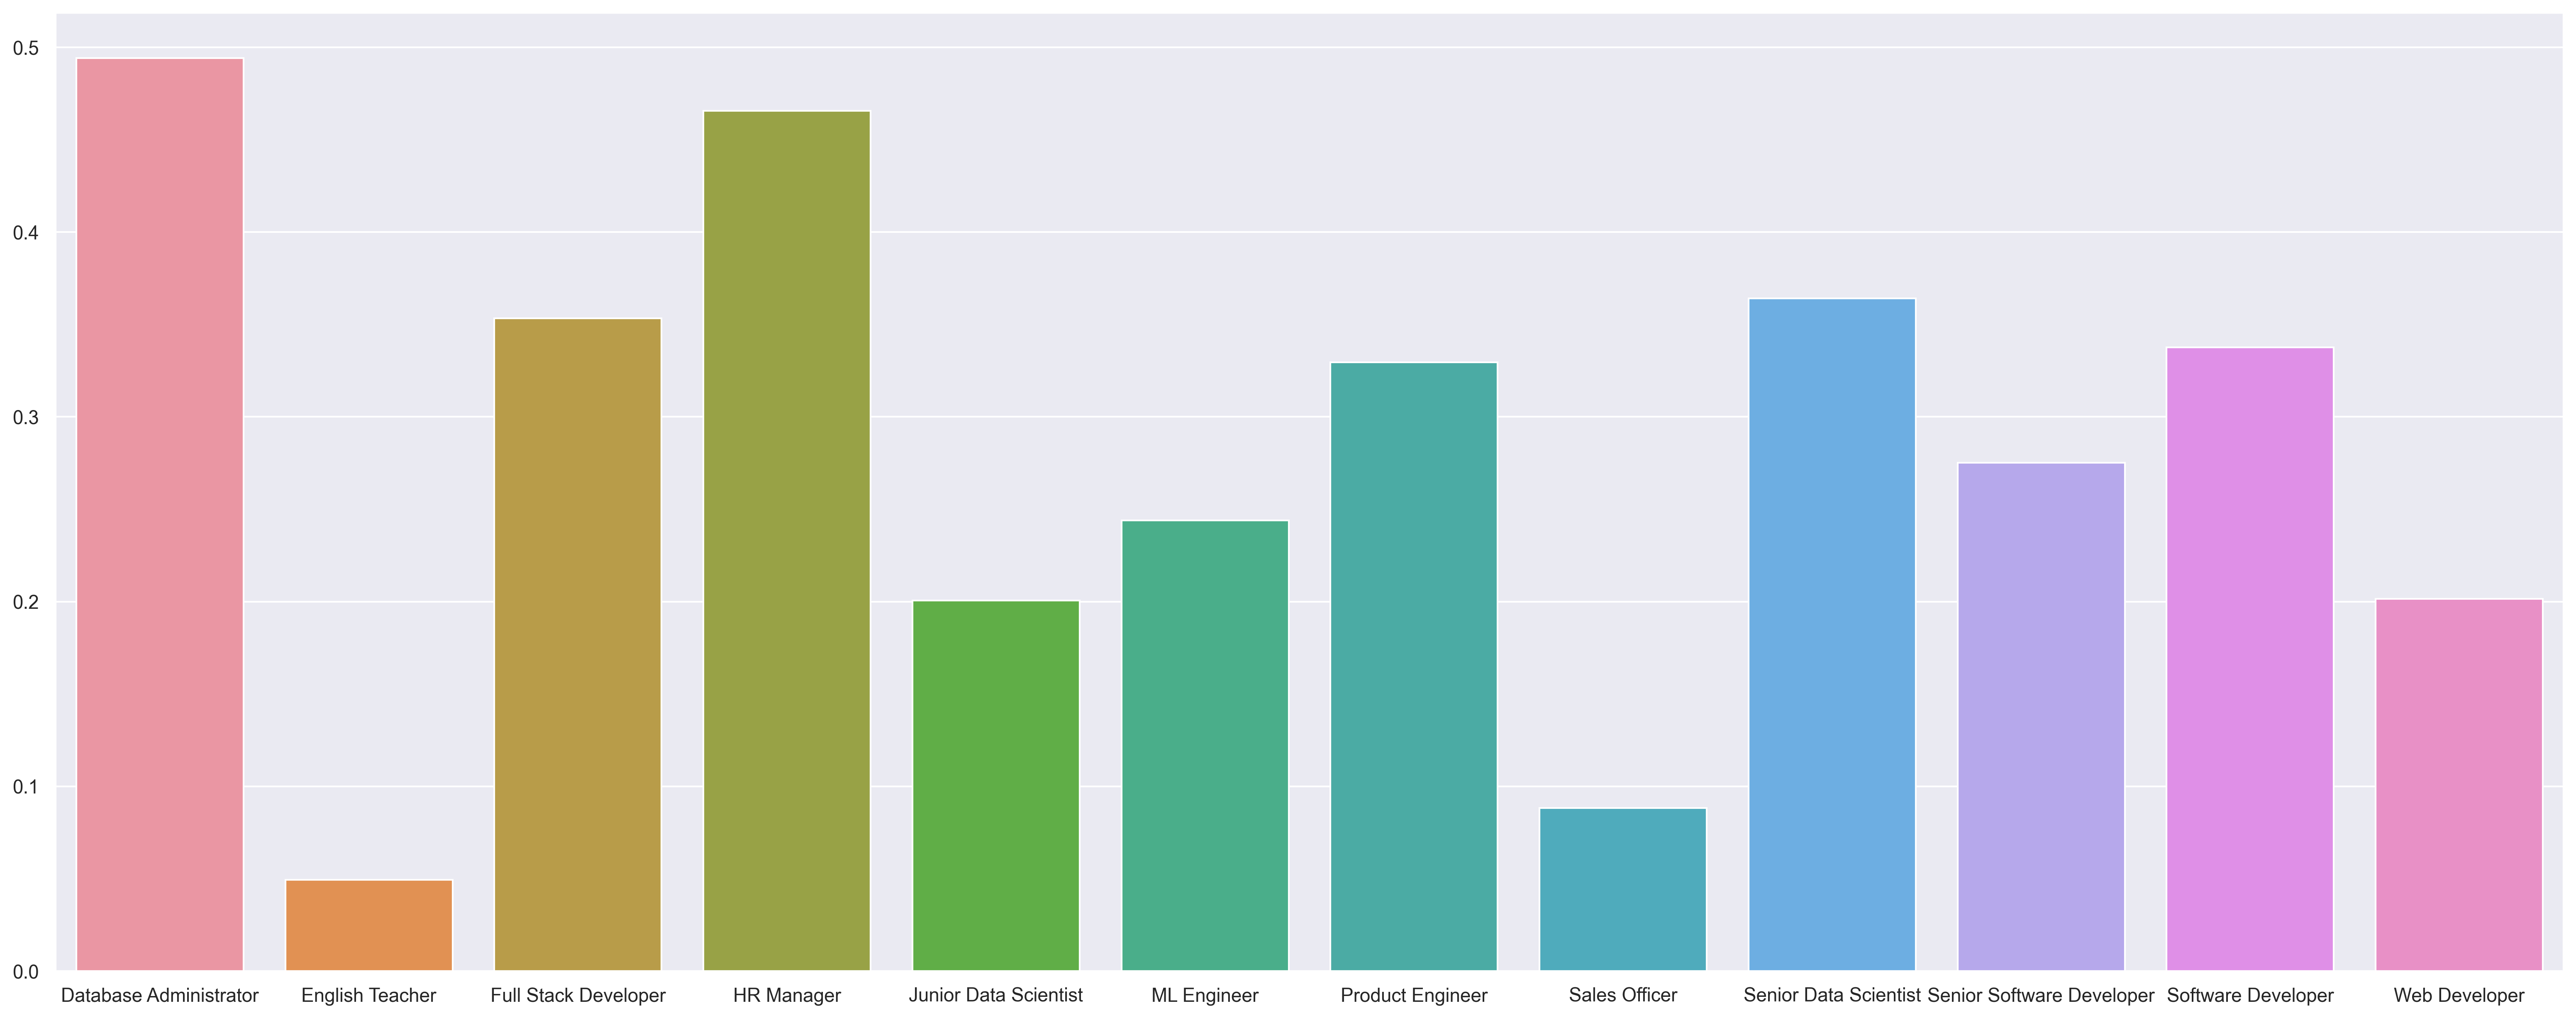

In [15]:
job = extract_from_pdf('docs/jobs/IT Project Manager.pdf')
job = pre_process(job)
job_enc = encode(job)
scores = util.cos_sim(job_enc, cvs_enc).numpy()
_, ax = plt.subplots(figsize=(26,10), dpi=300)
sns.barplot(x=cv_names, y=scores[0], ax=ax)

<Axes: >

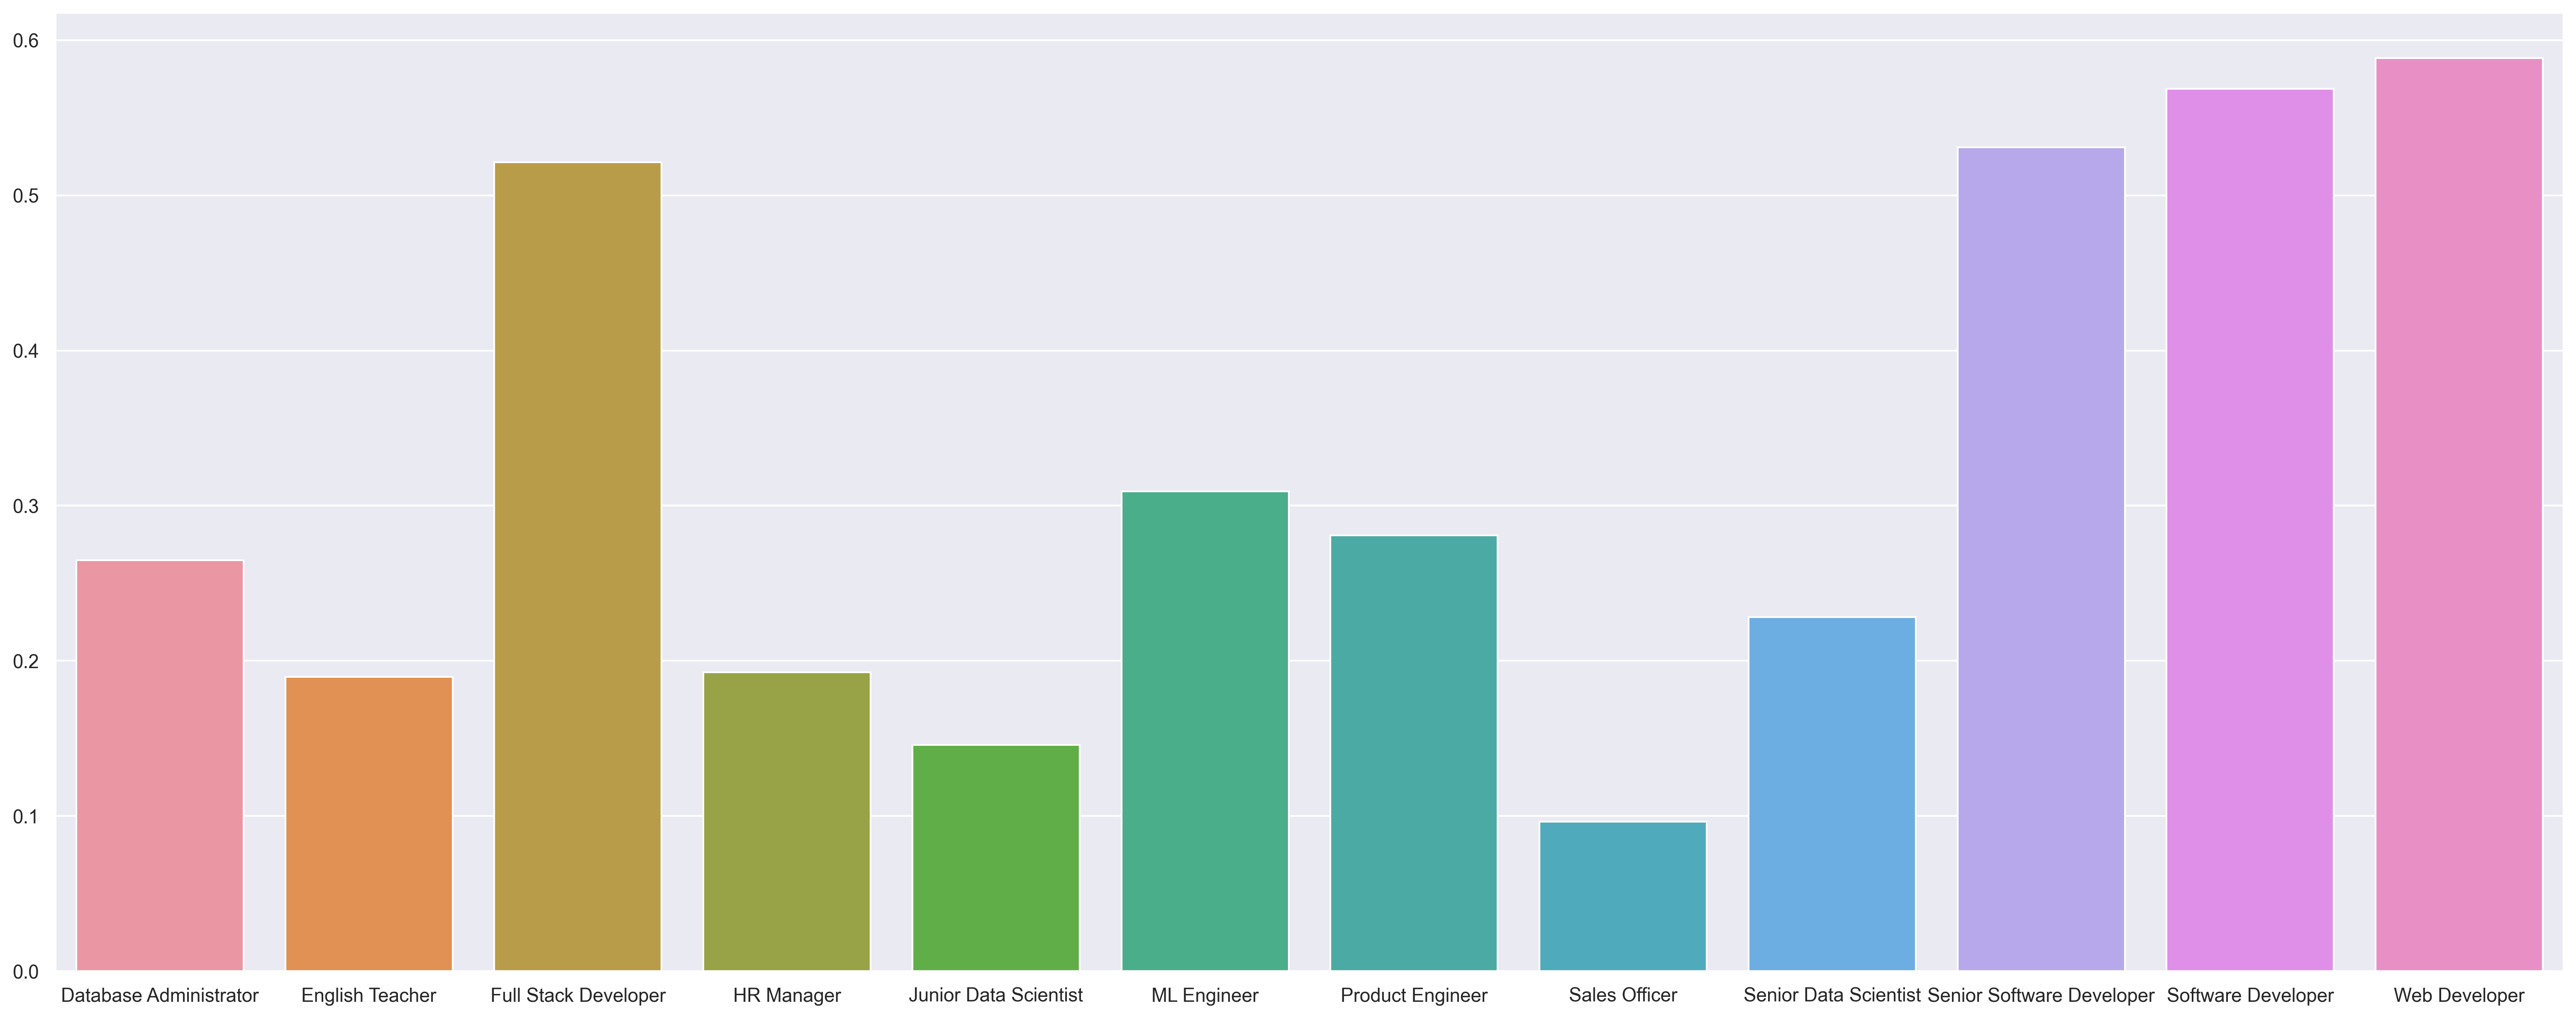

In [16]:
job = extract_from_pdf('docs/jobs/Web Developer.pdf')
job = pre_process(job)
job_enc = encode(job)
scores = util.cos_sim(job_enc, cvs_enc).numpy()
_, ax = plt.subplots(figsize=(26,10), dpi=300)
sns.barplot(x=cv_names, y=scores[0], ax=ax)

# Different language

<Axes: >

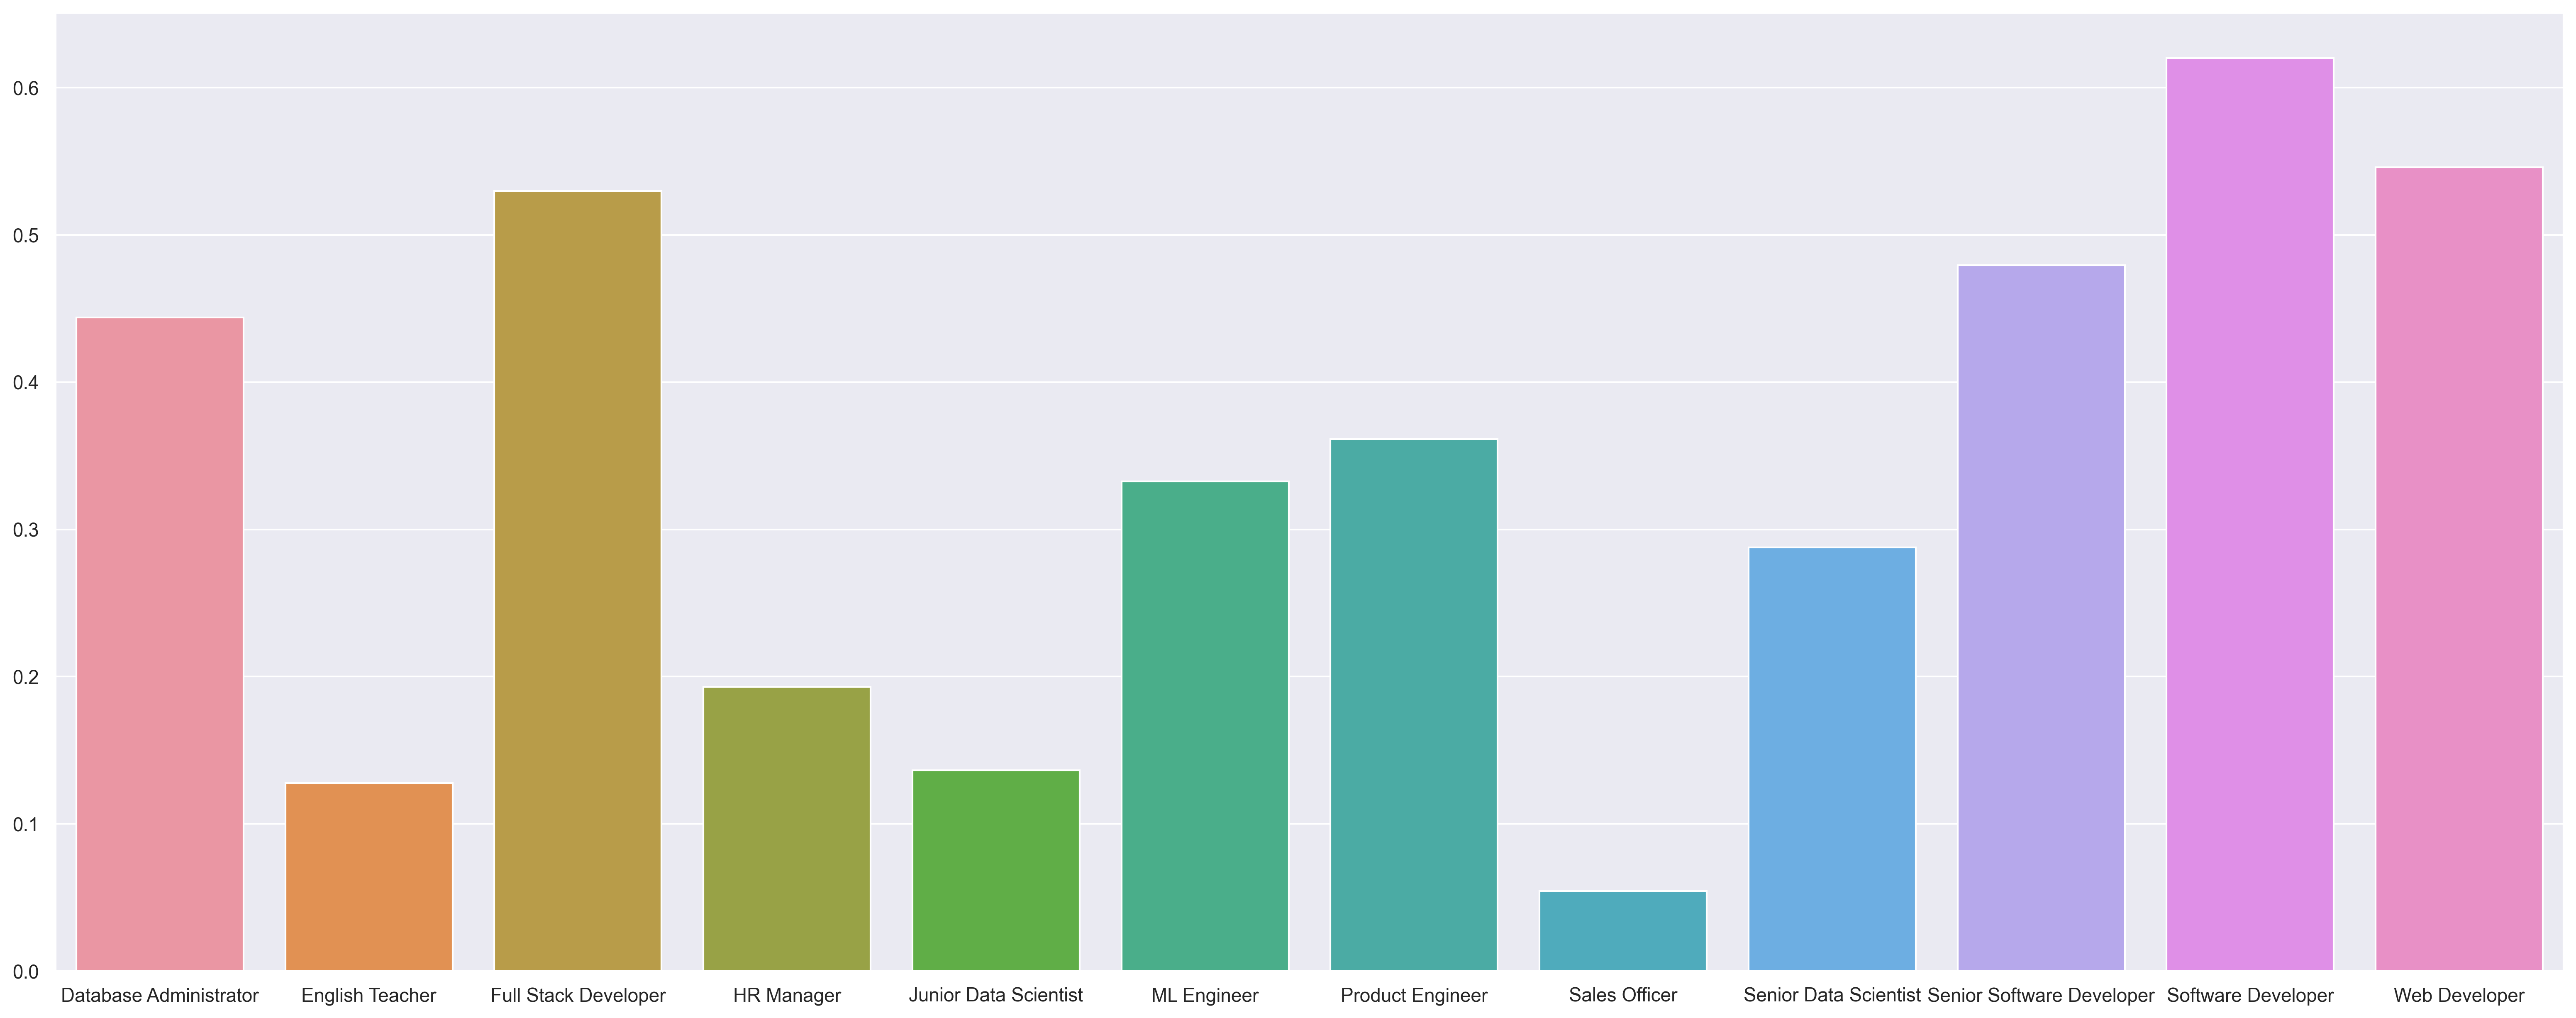

In [17]:
job = extract_from_pdf('docs/jobs/ITA Web Developer.pdf')
job = pre_process(job)
job_enc = encode(job)
scores = util.cos_sim(job_enc, cvs_enc).numpy()
_, ax = plt.subplots(figsize=(26,10), dpi=300)
sns.barplot(x=cv_names, y=scores[0], ax=ax)

<Axes: >

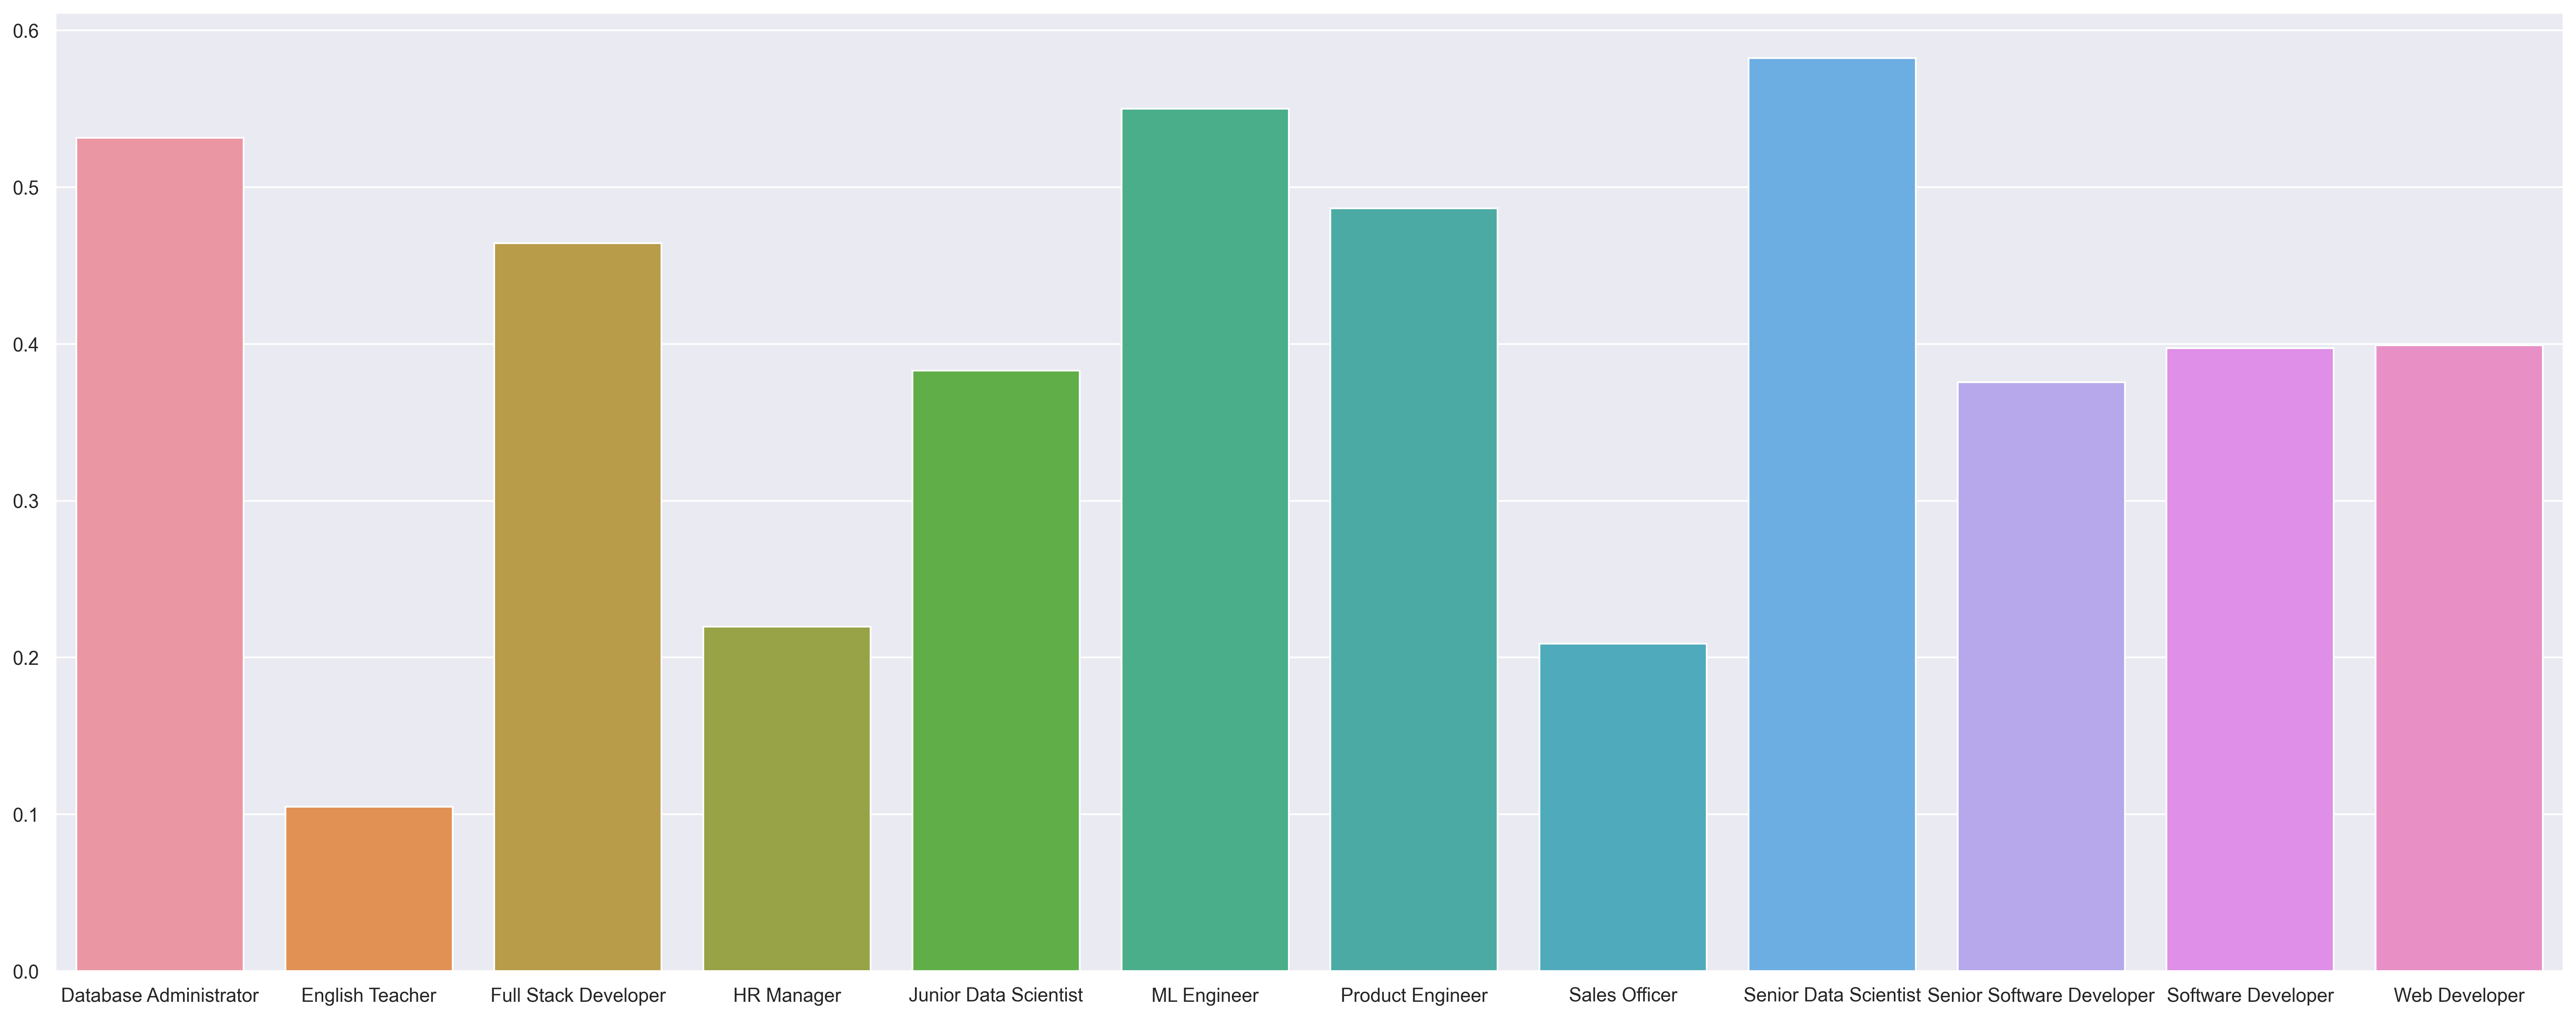

In [18]:
job = extract_from_pdf('docs/jobs/ITA Data Scientist.pdf')
job = pre_process(job)
job_enc = encode(job)
scores = util.cos_sim(job_enc, cvs_enc).numpy()
_, ax = plt.subplots(figsize=(26,10), dpi=300)
sns.barplot(x=cv_names, y=scores[0], ax=ax)